National Basketball Association (NBA), professional basketball league formed in the United States in 1949.
The given datasets consists of players personal details in players_data.csv and players.csv and in NBA_season1718_salary.csv there is player name and salary given to that player the team name the player is playing for, the other csv file called Season_stats consists the data about player stats like(minutes played, win share, field goals made, field goals attempted, free throws made, attempted , percentage of free throw, assists etc) where as in this dataset player stats is important to predict the player salary than the player personal details 

# Import Necessary libraries

In [1]:
# Importiang all necessary Libaries: Data Science Packages
import numpy as np # numpy used for mathematical operation on array
import pandas as pd  # pandas used for data manipulation on dataframe
import seaborn as sns # seaborn used for data visualization
import matplotlib.pyplot as plt # matplotlib used for data visualization
import warnings
warnings.filterwarnings('ignore')

# Load the Data

In [2]:
# Load the CSV files
players = pd.read_csv('C:/Users/csc/OneDrive/Desktop/CHAID/NBA/Players.csv',header=0)
players = players.drop(players.columns[0], axis=1)
player_data = pd.read_csv('C:/Users/csc/OneDrive/Desktop/CHAID/NBA/player_data.csv',header=0)
stats = pd.read_csv('C:/Users/csc/OneDrive/Desktop/CHAID/NBA/Seasons_Stats.csv',header=0)
stats = stats.drop(stats.columns[0], axis=1)
nba = pd.read_csv('C:/Users/csc/OneDrive/Desktop/CHAID/NBA/NBA_season1718_salary.csv',header=0)
nba = nba.drop(nba.columns[0], axis=1)

In [3]:
#to display maximum rows and columns
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns',1000)

# Exploratory data analysis

In [4]:
# Reading 3 Rows of the Players.csv
players.sample(3)

,Player,height,weight,college,born,birth_city,birth_state
1577,Jeff Taylor,193.0,79.0,Texas Tech University,1960.0,Blytheville,Arkansas
1545,Sleepy Floyd,190.0,77.0,Georgetown University,1960.0,Gastonia,North Carolina
3836,Malik Beasley,196.0,88.0,Florida State University,1996.0,Atlanta,Georgia


In [5]:
# Checking the shape of the data
players.shape

(3922, 7)

In [6]:
# Checking the data types of the attributes
players.dtypes

Player          object
height         float64
weight         float64
college         object
born           float64
birth_city      object
birth_state     object
dtype: object

In [7]:
# Reading 3 Rows of the Players_data.csv
player_data.sample(3)

,name,year_start,year_end,position,height,weight,birth_date,collage
2227,Linas Kleiza,2006,2013,F,8-Jun,245.0,3-Jan-85,University of Missouri
1299,Rick Fox,1992,2004,F-G,7-Jun,230.0,24-Jul-69,University of North Carolina
4024,Mel Thurston,1948,1948,G,Jun-00,175.0,16-Jan-19,Canisius College


In [8]:
#to rename the column name, so that merging can be done based on that column
player_data.rename(columns = {'name':'Player'}, inplace = True) 

In [9]:
player_data.shape

(4550, 8)

In [10]:
player_data.dtypes

Player         object
year_start      int64
year_end        int64
position       object
height         object
weight        float64
birth_date     object
collage        object
dtype: object

In [11]:
# Dropping column, which is already present in other dataset
player_data = player_data.drop('collage', axis = 1 )
player_data = player_data.drop('birth_date', axis = 1 )
player_data = player_data.drop('height', axis = 1 )
player_data = player_data.drop('weight', axis = 1 )

In [12]:
player_data.sample(3)

,Player,year_start,year_end,position
3070,Billy Owens,1992,2001,F-G
4116,John Vallely,1971,1972,G
1774,Tyrone Hill,1991,2004,F


In [13]:
#merging the data based on player column (merge1)
df = pd.merge(players,player_data,on='Player')

In [14]:
#dataset after merging
df.sample()

,Player,height,weight,college,born,birth_city,birth_state,year_start,year_end,position
950,Rod Derline,183.0,79.0,Seattle University,1952.0,Elma,Washington,1975,1976,G


In [15]:
df.shape

(3814, 10)

In [16]:
# Reading 3 Rows of the season_stats.csv
stats.sample(3)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3934,1974.0,Happy Hairston,PF,31.0,LAL,77.0,NaN,2634.0,17.2,0.583,NaN,0.586,12.1,23.5,18.0,10.5,1.0,0.3,NaN,NaN,NaN,5.6,3.7,9.3,0.170,NaN,1.6,0.4,2.0,2.7,385.0,759.0,0.507,NaN,NaN,NaN,385.0,759.0,0.507,0.507,343.0,445.0,0.771,335.0,705.0,1040.0,208.0,64.0,17.0,NaN,264.0,1113.0
15715,2002.0,Juwan Howard,PF,28.0,DEN,28.0,28.0,976.0,17.1,0.515,0.002,0.362,9.5,16.8,13.0,14.4,1.0,1.3,13.2,25.7,NaN,1.1,0.5,1.6,0.078,NaN,0.3,-0.7,-0.4,0.4,192.0,420.0,0.457,0.0,1.0,0.000,192.0,419.0,0.458,0.457,117.0,152.0,0.770,85.0,137.0,222.0,76.0,18.0,17.0,74.0,95.0,501.0
15105,2001.0,Kevin Edwards,SG,35.0,VAN,46.0,5.0,634.0,8.3,0.414,0.112,0.312,4.2,10.6,7.4,12.9,2.4,0.9,16.1,16.6,NaN,-0.6,0.5,-0.1,-0.011,NaN,-4.6,0.2,-4.4,-0.4,56.0,170.0,0.329,5.0,19.0,0.263,51.0,151.0,0.338,0.344,43.0,53.0,0.811,23.0,59.0,82.0,52.0,29.0,8.0,37.0,46.0,160.0


In [17]:
#checking whether position column is same as pos
df.position.head(10)

0    G-F
1      G
2    F-G
3      F
4      G
5    G-F
6    F-C
7      G
8    F-C
9      F
Name: position, dtype: object

In [18]:
stats.Pos.head(10)

0    G-F
1     SG
2     SF
3      F
4      F
5      F
6      G
7    G-F
8    F-C
9    F-C
Name: Pos, dtype: object

In [19]:
#dropping year and pos columns because those columns were already present in other dataset  
stats = stats.drop('Year', axis = 1 )
stats = stats.drop('Pos', axis = 1 )

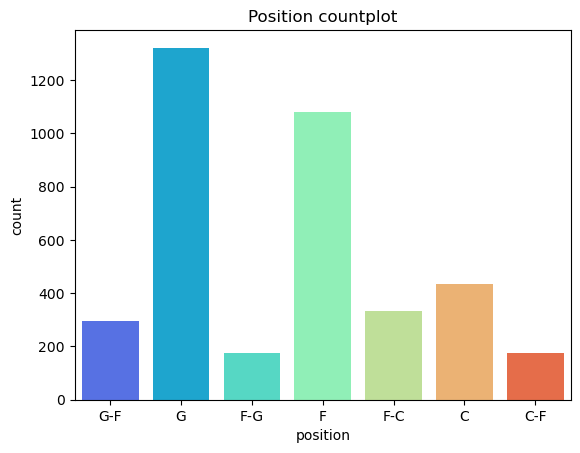

In [20]:
# Countplot of position
sns.countplot(x ='position', data = df, palette='rainbow')
plt.title('Position countplot')
plt.show()

In [21]:
# merge 2 datasets based on player column (merge 2)
df = pd.merge(df,stats,on='Player')

In [22]:
df.head(5)

,Player,height,weight,college,born,birth_city,birth_state,year_start,year_end,position,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,NaN,0.467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN,NaN,144.0,516.0,0.279,NaN,NaN,NaN,144.0,516.0,0.279,0.279,170.0,241.0,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN,1949,1951,G-F,32.0,FTW,38.0,NaN,NaN,NaN,0.372,NaN,0.388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.3,0.9,0.6,NaN,NaN,NaN,NaN,NaN,NaN,72.0,232.0,0.310,NaN,NaN,NaN,72.0,232.0,0.310,0.310,58.0,90.0,0.644,NaN,NaN,89.0,77.0,NaN,NaN,NaN,97.0,202.0
2,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,G,29.0,INO,49.0,NaN,NaN,NaN,0.435,NaN,0.387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN,NaN,102.0,274.0,0.372,NaN,NaN,NaN,102.0,274.0,0.372,0.372,75.0,106.0,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
3,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,G,30.0,INO,56.0,NaN,NaN,NaN,0.322,NaN,0.381,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.9,0.7,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,51.0,202.0,0.252,NaN,NaN,NaN,51.0,202.0,0.252,0.252,50.0,77.0,0.649,NaN,NaN,100.0,115.0,NaN,NaN,NaN,98.0,152.0
4,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana,1950,1952,G,31.0,INO,44.0,NaN,494.0,10.8,0.343,NaN,0.317,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.7,0.8,0.1,0.008,NaN,NaN,NaN,NaN,NaN,48.0,161.0,0.298,NaN,NaN,NaN,48.0,161.0,0.298,0.298,30.0,51.0,0.588,NaN,NaN,81.0,70.0,NaN,NaN,NaN,56.0,126.0


In [23]:
nba.sample(3)

,Player,Tm,season17_18
329,T.J. Leaf,IND,2028360.0
88,Marvin Williams,CHO,13168750.0
119,Jon Leuer,DET,10497319.0


In [24]:
#dropping Tm column because it was already present in other datatset
nba = nba.drop('Tm', axis = 1 )

In [25]:
nba.sample(3)

,Player,season17_18
448,Isaiah Canaan,1069308.0
274,Gary Harris,2550055.0
440,Derrick Jones,1312611.0


In [26]:
#merging the data based on player column (merge 3)
data = pd.merge(nba,df,on='Player')

In [27]:
data.head(5)

,Player,season17_18,height,weight,college,born,birth_city,birth_state,year_start,year_end,position,Age,Tm,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,blanl,OWS,DWS,WS,WS/48,blank2,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Stephen Curry,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio,2010,2018,G,21.0,GSW,80.0,77.0,2896.0,16.3,0.568,0.332,0.175,1.8,12.0,6.8,24.6,2.5,0.5,16.5,21.8,NaN,3.0,1.6,4.7,0.077,NaN,1.8,-0.7,1.0,2.2,528.0,1143.0,0.462,166.0,380.0,0.437,362.0,763.0,0.474,0.535,177.0,200.0,0.885,48.0,308.0,356.0,472.0,152.0,19.0,243.0,252.0,1399.0
1,Stephen Curry,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio,2010,2018,G,22.0,GSW,74.0,74.0,2489.0,19.4,0.595,0.325,0.216,2.3,10.9,6.5,28.1,2.2,0.6,16.4,24.4,NaN,5.4,1.3,6.6,0.128,NaN,3.5,-1.6,1.9,2.4,505.0,1053.0,0.480,151.0,342.0,0.442,354.0,711.0,0.498,0.551,212.0,227.0,0.934,52.0,234.0,286.0,432.0,109.0,20.0,226.0,233.0,1373.0
2,Stephen Curry,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio,2010,2018,G,23.0,GSW,26.0,23.0,732.0,21.2,0.605,0.409,0.159,2.3,11.3,6.8,32.3,2.8,0.8,17.0,24.0,NaN,1.8,0.4,2.2,0.144,NaN,4.7,-1.3,3.4,1.0,145.0,296.0,0.490,55.0,121.0,0.455,90.0,175.0,0.514,0.583,38.0,47.0,0.809,15.0,73.0,88.0,138.0,39.0,8.0,65.0,62.0,383.0
3,Stephen Curry,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio,2010,2018,G,24.0,GSW,78.0,78.0,2983.0,21.3,0.589,0.432,0.210,2.3,9.1,5.8,31.1,2.1,0.3,13.7,26.4,NaN,8.4,2.8,11.2,0.180,NaN,6.3,-0.9,5.4,5.6,626.0,1388.0,0.451,272.0,600.0,0.453,354.0,788.0,0.449,0.549,262.0,291.0,0.900,59.0,255.0,314.0,539.0,126.0,12.0,240.0,198.0,1786.0
4,Stephen Curry,34682550.0,190.0,86.0,Davidson College,1988.0,Akron,Ohio,2010,2018,G,25.0,GSW,78.0,78.0,2846.0,24.1,0.610,0.445,0.252,1.8,10.9,6.4,39.9,2.2,0.4,16.1,28.3,NaN,9.3,4.0,13.4,0.225,NaN,7.4,0.0,7.4,6.7,652.0,1383.0,0.471,261.0,615.0,0.424,391.0,768.0,0.509,0.566,308.0,348.0,0.885,46.0,288.0,334.0,666.0,128.0,14.0,294.0,194.0,1873.0


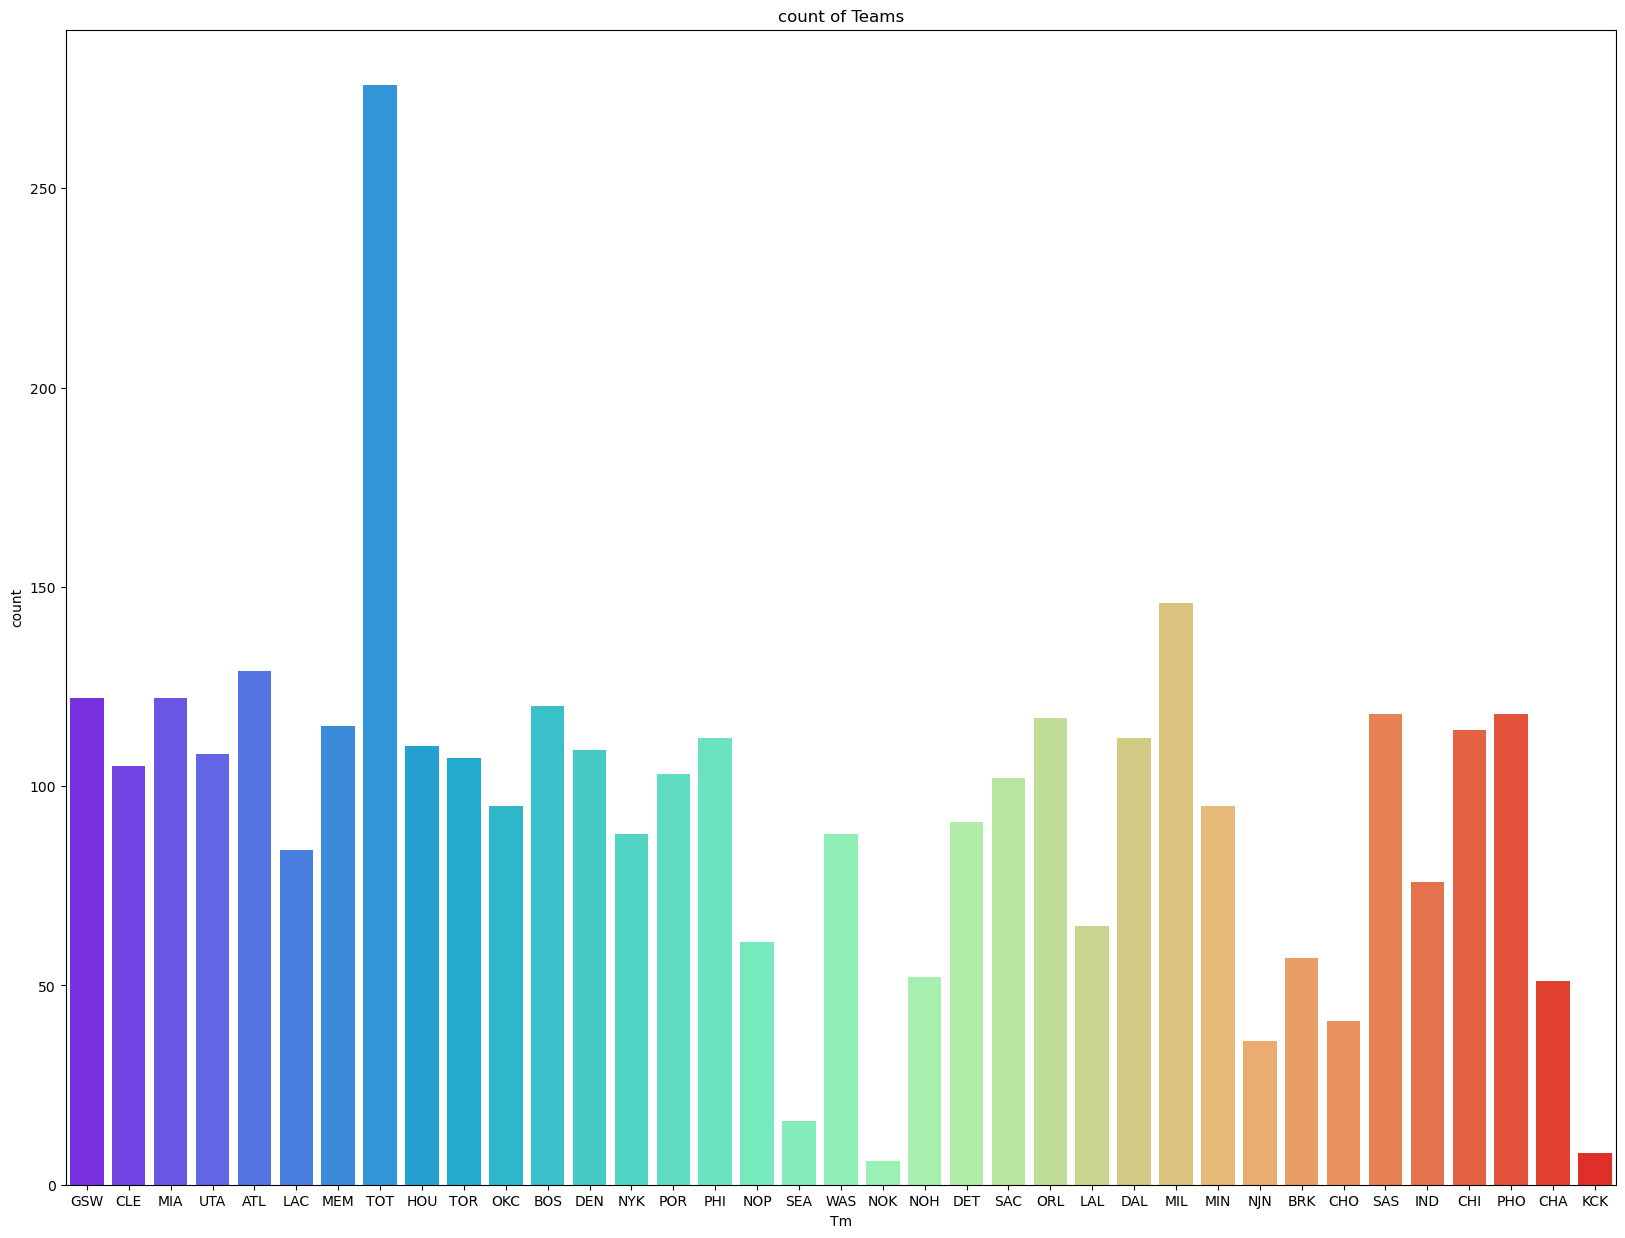

In [28]:
fig, ax = plt.subplots(figsize=(20, 15))
sns.countplot(x ='Tm', data = data, ax=ax, palette='rainbow')
plt.title('count of Teams')
# Show the plot
plt.show()

In [29]:
data.shape

(3475, 60)

In [30]:
# Check for missing values and arranging in decending order
print(data.isnull().sum().sort_values(ascending=False))

blanl          3475
blank2         3475
college         712
3P%             272
birth_state     152
birth_city      151
FT%              52
3PAr             16
GS               16
2P%              14
3P               10
3PA              10
TOV%              7
FG%               6
FTr               6
eFG%              6
TS%               6
USG%              2
TOV               2
2P                0
FGA               0
FG                0
Player            0
2PA               0
BPM               0
FT                0
FTA               0
ORB               0
DRB               0
TRB               0
AST               0
STL               0
BLK               0
PF                0
VORP              0
DWS               0
DBPM              0
OBPM              0
height            0
weight            0
born              0
year_start        0
year_end          0
position          0
Age               0
Tm                0
G                 0
MP                0
PER               0
ORB%              0


In [31]:
#dropping these 2 columns because it doesn't consist any data
data = data.drop('blanl', axis = 1 )
data = data.drop('blank2', axis = 1 )

In [32]:
# Check for duplicates
data.drop_duplicates(inplace=True)

In [33]:
#shape of the dataset after merging and dropping duplicate columns and rows
data.shape 

(3467, 58)

In [34]:
#getting information(like non-null count and datatypes) about all attributes
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3467 entries, 0 to 3474
Data columns (total 58 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Player       3467 non-null   object 
 1   season17_18  3467 non-null   float64
 2   height       3467 non-null   float64
 3   weight       3467 non-null   float64
 4   college      2755 non-null   object 
 5   born         3467 non-null   float64
 6   birth_city   3316 non-null   object 
 7   birth_state  3315 non-null   object 
 8   year_start   3467 non-null   int64  
 9   year_end     3467 non-null   int64  
 10  position     3467 non-null   object 
 11  Age          3467 non-null   float64
 12  Tm           3467 non-null   object 
 13  G            3467 non-null   float64
 14  GS           3451 non-null   float64
 15  MP           3467 non-null   float64
 16  PER          3467 non-null   float64
 17  TS%          3461 non-null   float64
 18  3PAr         3451 non-null   float64
 19  FTr   

In [35]:
#check for unique values present in all columns
data.nunique()

Player          446
season17_18     310
height           19
weight           50
college         117
born             51
birth_city      280
birth_state      79
year_start       29
year_end         13
position          7
Age              23
Tm               37
G                83
GS               83
MP             1986
PER             294
TS%             333
3PAr            647
FTr             607
ORB%            176
DRB%            293
TRB%            225
AST%            435
STL%             53
BLK%             91
TOV%            242
USG%            274
OWS             145
DWS              73
WS              172
WS/48           373
OBPM            200
DBPM            132
BPM             229
VORP            103
FG              677
FGA            1219
FG%             353
3P              220
3PA             483
3P%             314
2P              610
2PA            1029
2P%             341
eFG%            340
FT              467
FTA             554
FT%             458
ORB             287


In [36]:
# checking for unique values present in categorical columns
data.select_dtypes(include=['object']).nunique()

Player         446
college        117
birth_city     280
birth_state     79
position         7
Tm              37
dtype: int64

In [37]:
#checking for null values
data.isnull().sum().sort_values(ascending=False)

college        712
3P%            271
birth_state    152
birth_city     151
FT%             51
3PAr            16
GS              16
2P%             14
3PA             10
3P              10
TOV%             7
FG%              6
TS%              6
FTr              6
eFG%             6
USG%             2
TOV              2
2PA              0
FGA              0
2P               0
FG               0
Player           0
FT               0
BPM              0
FTA              0
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
PF               0
VORP             0
DWS              0
DBPM             0
OBPM             0
height           0
weight           0
born             0
year_start       0
year_end         0
position         0
Age              0
Tm               0
G                0
MP               0
PER              0
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%        

In [38]:
#descriptive statistics
data.describe()

,season17_18,height,weight,born,year_start,year_end,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,3.467000e+03,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3451.000000,3467.000000,3467.000000,3461.000000,3451.000000,3461.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3460.000000,3465.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3461.000000,3457.000000,3457.000000,3196.000000,3467.000000,3467.000000,3453.000000,3461.000000,3467.000000,3467.000000,3416.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3467.000000,3465.000000,3467.000000,3467.000000
mean,7.682113e+06,199.331699,97.580906,1981.339775,2008.090857,2016.853764,25.567349,56.958177,32.522167,1486.564177,14.620248,0.533071,0.255152,0.289135,5.058091,14.234929,9.654543,15.086674,1.660283,1.530949,13.417457,20.001010,1.903432,1.513989,3.417883,0.094728,-0.325123,-0.296423,-0.622411,0.972714,246.153447,537.528988,0.451145,46.568412,130.444316,0.300391,199.719354,407.460917,0.482744,0.495096,123.291318,160.743871,0.750844,63.474762,190.245457,253.720219,148.898760,48.663109,29.215172,89.931313,119.646957,662.032305
std,7.829046e+06,9.560186,12.515473,13.539365,6.707266,4.501999,3.864147,23.455910,30.194966,884.968249,6.325443,0.068643,0.197799,0.157313,4.856761,6.090093,4.875708,10.256994,0.797732,1.590497,4.820616,5.127368,2.303364,1.271732,3.265902,0.096311,3.337475,2.038814,3.689390,1.569318,182.126892,386.787192,0.076147,51.232286,134.861421,0.140134,162.969436,323.960296,0.078850,0.071889,118.766763,150.412965,0.119793,64.459747,148.707777,205.485202,149.340912,36.391626,37.184501,67.682888,68.571690,498.564631
min,1.722400e+04,175.000000,68.000000,1920.000000,1977.000000,1990.000000,18.000000,1.000000,0.000000,1.000000,-54.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.300000,-0.200000,-2.100000,-1.312000,-43.900000,-23.100000,-47.700000,-1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.662500e+06,190.000000,87.000000,1980.000000,2005.000000,2018.000000,23.000000,41.000000,3.000000,719.000000,11.550000,0.506000,0.058500,0.191000,1.900000,9.600000,5.900000,7.500000,1.200000,0.400000,10.500000,16.500000,0.200000,0.500000,0.900000,0.057000,-1.900000,-1.500000,-2.400000,0.000000,95.000000,218.000000,0.414000,2.000000,10.000000,0.265000,68.000000,143.500000,0.448000,0.465000,34.000000,48.000000,0.698750,18.000000,78.500000,102.000000,42.000000,20.000000,6.000000,36.000000,64.500000,254.500000
50%,4.666500e+06,201.000000,97.000000,1986.000000,2009.000000,2018.000000,25.000000,65.000000,23.000000,1513.000000,14.400000,0.536000,0.256000,0.266000,3.500000,13.000000,8.400000,12.100000,1.600000,1.000000,12.900000,19.500000,1.200000,1.200000,2.600000,0.093000,-0.300000,-0.300000,-0.600000,0.400000,216.000000,481.000000,0.445000,29.000000,89.000000,0.336000,163.000000,336.000000,0.481000,0.496000,90.000000,121.000000,0.772000,41.000000,162.000000,208.000000,100.000000,43.000000,16.000000,76.000000,122.000000,577.000000
75%,1.224327e+07,208.000000,106.000000,1989.000000,2012.000000,2018.000000,28.000000,77.000000,63.000000,2208.500000,17.400000,0.566000,0.396000,0.360000,7.550000,18.300000,12.850000,20.900000,2.100000,2.100000,15.700000,23.200000,2.900000,2.200000,5.000000,0.132000,1.100000,1.000000,1.300000,1.600000,362.000000,784.000000,0.485000,77.000000,217.000000,0.376000,294.000000,601.000000,0.516000,0.528000,176.000000,228.500000,0.826000,89.000000,260.000000,348.000000,209.000000,69.000000,37.000000,131.000000,170.000000,975.000000
max,3.

In [39]:
#descriptive statistics for categorical columns
data.describe(include=['object'])

,Player,college,birth_city,birth_state,position,Tm
count,3467,2755,3316,3315,3467,3467
unique,446,117,280,79,7,37
top,Mike Dunleavy,University of Kentucky,Chicago,California,G,TOT
freq,64,134,136,399,1389,274


# Data Preprocessing

In [40]:
#Missing value imputation
# Find columns with missing values
missing_columns = data.columns[data.isnull().any()]

# Impute missing values with mean for numeric columns and mode for categorical columns
for col in missing_columns:
    if data[col].dtype == 'float64' or data[col].dtype == 'int64':
        data[col].fillna(data[col].median(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

# Check for missing values in entire dataset
total_missing_values =data.isnull().sum().sum()
print("Total missing values after imputation:", total_missing_values)

Total missing values after imputation: 0


In [41]:
data.columns

Index(['Player', 'season17_18', 'height', 'weight', 'college', 'born',
       'birth_city', 'birth_state', 'year_start', 'year_end', 'position',
       'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [42]:
df=data

In [43]:
df.select_dtypes(include=['object']).nunique()

Player         446
college        117
birth_city     280
birth_state     79
position         7
Tm              37
dtype: int64

In [44]:
# convert categorical columns to numerical
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Player']= label_encoder.fit_transform(df['Player'])
df['college']= label_encoder.fit_transform(df['college'])
df['birth_city']= label_encoder.fit_transform(df['birth_city'])
df['birth_state']= label_encoder.fit_transform(df['birth_state'])
df['position']= label_encoder.fit_transform(df['position'])
df['Tm']= label_encoder.fit_transform(df['Tm'])

In [45]:
df.dtypes

Player           int32
season17_18    float64
height         float64
weight         float64
college          int32
born           float64
birth_city       int32
birth_state      int32
year_start       int64
year_end         int64
position         int32
Age            float64
Tm               int32
G              float64
GS             float64
MP             float64
PER            float64
TS%            float64
3PAr           float64
FTr            float64
ORB%           float64
DRB%           float64
TRB%           float64
AST%           float64
STL%           float64
BLK%           float64
TOV%           float64
USG%           float64
OWS            float64
DWS            float64
WS             float64
WS/48          float64
OBPM           float64
DBPM           float64
BPM            float64
VORP           float64
FG             float64
FGA            float64
FG%            float64
3P             float64
3PA            float64
3P%            float64
2P             float64
2PA        

In [46]:
# outlier detection
col = ['Player', 'season17_18', 'height', 'weight', 'college', 'born','birth_city', 'birth_state', 'year_start', 'year_end', 'position',
'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%','DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P','3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
def detect_outliers(data, threshold=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    upper_bound = q3 + threshold*IQR
    lower_bound = q1 - threshold*IQR
    outliers = (data > upper_bound) | (data < lower_bound)
    return outliers

# Check for outliers in each feature
for feature in col:
    outliers = detect_outliers(df[feature].dropna())
    n_outliers = np.sum(outliers)
    print(f'{n_outliers} outliers detected in {feature}')

0 outliers detected in Player
87 outliers detected in season17_18
0 outliers detected in height
6 outliers detected in weight
25 outliers detected in college
484 outliers detected in born
0 outliers detected in birth_city
0 outliers detected in birth_state
114 outliers detected in year_start
745 outliers detected in year_end
0 outliers detected in position
55 outliers detected in Age
0 outliers detected in Tm
0 outliers detected in G
0 outliers detected in GS
0 outliers detected in MP
109 outliers detected in PER
173 outliers detected in TS%
9 outliers detected in 3PAr
100 outliers detected in FTr
25 outliers detected in ORB%
27 outliers detected in DRB%
20 outliers detected in TRB%
69 outliers detected in AST%
56 outliers detected in STL%
186 outliers detected in BLK%
123 outliers detected in TOV%
43 outliers detected in USG%
144 outliers detected in OWS
75 outliers detected in DWS
109 outliers detected in WS
127 outliers detected in WS/48
148 outliers detected in OBPM
61 outliers det

In [47]:
# outlier treatment
def find_outliers_limit(df,col):
    print(col)
    print('-'*50)
    #removing outliers
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    print('Lower:',lower,' Upper:',upper)
    return lower,upper
def remove_outlier(df,col,upper,lower):
    # identify outliers
    outliers = [x for x in df[col] if x ==upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in df[col] if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    final= np.where(df[col]>upper,upper,np.where(df[col]<lower,lower,df[col]))
    return final
outlier_cols=['Player', 'season17_18', 'height', 'weight', 'college', 'born','birth_city', 'birth_state', 'year_start', 'year_end', 'position',
'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%','DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P','3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']
for col in outlier_cols:
    lower,upper=find_outliers_limit(df,col)
    df[col]=remove_outlier(df,col,upper,lower)

Player
--------------------------------------------------
Percentiles: 25th=121.000, 75th=330.000, IQR=209.000
Lower: -192.5  Upper: 643.5
Identified outliers: 0
Non-outlier observations: 3467
season17_18
--------------------------------------------------
Percentiles: 25th=1662500.000, 75th=12243267.500, IQR=10580767.500
Lower: -14208651.25  Upper: 28114418.75
Identified outliers: 0
Non-outlier observations: 3380
height
--------------------------------------------------
Percentiles: 25th=190.000, 75th=208.000, IQR=18.000
Lower: 163.0  Upper: 235.0
Identified outliers: 0
Non-outlier observations: 3467
weight
--------------------------------------------------
Percentiles: 25th=87.000, 75th=106.000, IQR=19.000
Lower: 58.5  Upper: 134.5
Identified outliers: 0
Non-outlier observations: 3461
college
--------------------------------------------------
Percentiles: 25th=51.000, 75th=84.000, IQR=33.000
Lower: 1.5  Upper: 133.5
Identified outliers: 0
Non-outlier observations: 3442
born
----------

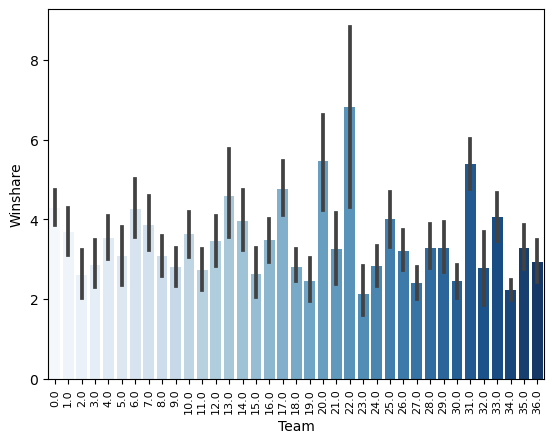

In [48]:
sns.barplot(x = 'Tm',y = 'WS',data = df,palette = "Blues")
#Adding the aesthetics
plt.xlabel('Team')
plt.ylabel('Winshare') 
plt.xticks(rotation=90, fontsize=8)
# Show the plot
plt.show()

Team MLH has more winshare

In [49]:
stats["Tm"].unique()

array(['FTW', 'INO', 'CHS', 'TOT', 'DNN', 'NYK', 'TRI', 'AND', 'PHW',
       'WAT', 'SHE', 'ROC', 'BLB', 'MNL', 'SYR', 'WSC', 'BOS', 'STB', nan,
       'MLH', 'STL', 'DET', 'CIN', 'LAL', 'CHP', 'SFW', 'CHZ', 'BAL',
       'PHI', 'CHI', 'SDR', 'SEA', 'MIL', 'ATL', 'PHO', 'POR', 'CLE',
       'BUF', 'HOU', 'GSW', 'KCO', 'CAP', 'NOJ', 'WSB', 'KCK', 'IND',
       'NYN', 'DEN', 'SAS', 'NJN', 'SDC', 'UTA', 'DAL', 'LAC', 'SAC',
       'CHH', 'MIA', 'ORL', 'MIN', 'VAN', 'TOR', 'WAS', 'MEM', 'NOH',
       'CHA', 'NOK', 'OKC', 'BRK', 'NOP', 'CHO'], dtype=object)

In [50]:
df["Tm"].unique()

array([10.,  6., 17., 35.,  0., 14., 16., 34., 11., 33., 25.,  1.,  8.,
       24., 29., 27., 23., 32., 36., 22., 21.,  9., 30., 26., 15.,  7.,
       18., 19., 20.,  2.,  5., 31., 12.,  4., 28.,  3., 13.])

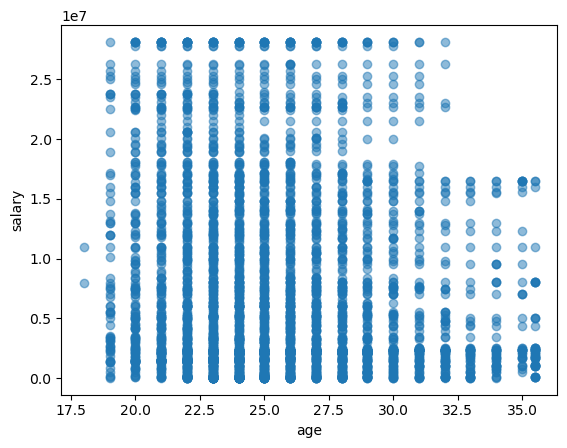

In [51]:
plt.scatter(df['Age'],df['season17_18'],alpha=0.5 )
#Adding the aesthetics
plt.xlabel('age')
plt.ylabel('salary') 
#Show the plot
plt.show()

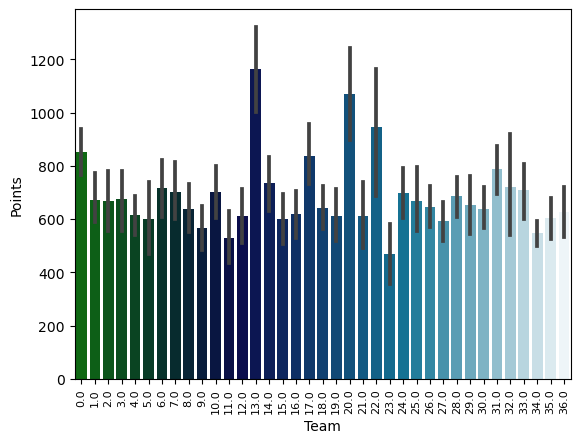

In [52]:
sns.barplot(x = 'Tm',y = 'PTS',data = df,palette = "ocean")
#Adding the aesthetics
plt.xlabel('Team')
plt.ylabel('Points')
plt.xticks(rotation=90, fontsize=8)
# Show the plot
plt.show()

Team CHO has more average points

<AxesSubplot:title={'center':'salary'}, xlabel='season17_18', ylabel='Density'>

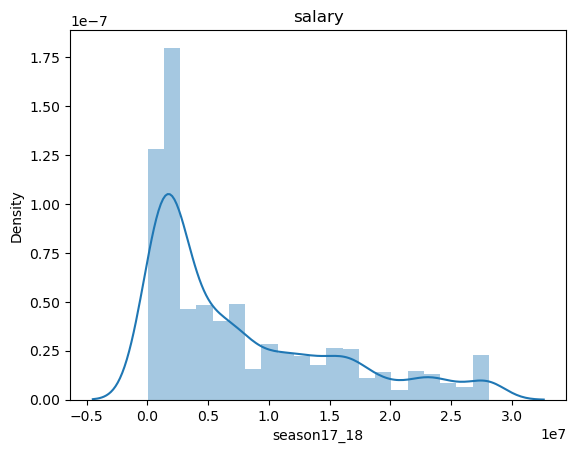

In [53]:
#Distribution plot for salary
plt.title('salary')
sns.distplot(df.season17_18)

In [54]:
# Dropping the target varable and save it in y
data = df.sample(frac = 1)
X = data.drop('season17_18', axis=1).values
y = data['season17_18'].values

# Feature selection

In [55]:
# Compute the Pearson correlation coefficient between each feature and the target variable
correlations = {}
for i, feature_name in enumerate(data.columns[:-1]):
    correlation = np.corrcoef(X[:, i], y)[0, 1]
    correlations[feature_name] = correlation

# Sort the features by their correlation with the target variable
sorted_features = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)

# Select the top 5 features with the highest correlation with the target variable
selected_features = [f[0] for f in sorted_features[:30]]

# Select the same features from X_train and X_test
X_selected = X[:, [np.where(data.columns == feature_name)[0][0] for feature_name in selected_features]]


print('Selected features:', selected_features)
print('Shape of X_selected:', X_selected.shape)

Selected features: ['year_start', 'DWS', 'USG%', 'BPM', 'FT', 'PF', 'eFG%', 'VORP', 'MP', 'ORB', 'DRB', 'OWS', 'DBPM', '3P%', 'FG', 'G', 'GS', '2P', 'WS', 'BLK', 'AST', 'WS/48', 'FT%', 'STL', 'TOV', 'Tm', 'TRB', 'TOV%', 'PER', '3PAr']
Shape of X_selected: (3467, 30)


# Train Test split

In [56]:
import math
s_f = 0.7
n_train = math.floor(s_f * X_selected.shape[0])
n_test = math.ceil((1-s_f) * X_selected.shape[0])
X_train = X_selected[:n_train]
y_train = y[:n_train]
X_test = X_selected[n_train:]
y_test = y[n_train:]
print("Total Number of rows in train:",X_train.shape[0])
print("Total Number of rows in test:",X_test.shape[0])

Total Number of rows in train: 2426
Total Number of rows in test: 1041


# Feature Scaling

In [57]:
# Compute the mean and standard deviation of each feature in X_train_selected
means = np.mean(X_train, axis=0)
stds = np.std(X_train, axis=0)

# Perform feature scaling on X_train_selected and X_test_selected
X_train_scaled = (X_train - means) / stds
X_test_scaled = (X_test - means) / stds
print('X_train_scaled shape',X_train_scaled.shape)
print('X_test_scaled shape',X_test_scaled.shape)

X_train_scaled shape (2426, 30)
X_test_scaled shape (1041, 30)


# Defining Decision tree Regressor

In [58]:
class Node:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx # index of feature used for splitting at this node
        self.threshold = threshold # threshold used for splitting at this node
        self.left = left # left subtree
        self.right = right # right subtree
        self.value = value # predicted value for this node (leaf node)

class DecisionTreeRegressor:
    def __init__(self, max_depth=None, min_samples_split=2, min_samples_leaf=1):
        self.max_depth = max_depth # maximum depth of tree
        self.min_samples_split = min_samples_split # minimum number of samples required to split a node
        self.min_samples_leaf = min_samples_leaf # minimum number of samples required in a leaf node
        self.root = None # root node of tree
        
    def fit(self, X_selected, y):
        self.root = self._build_tree(X_selected, y, depth=0)
    
    def predict(self, X_selected):
        return np.array([self._traverse(x, self.root) for x in X_selected])
    
    def _build_tree(self, X_selected, y, depth):
        n_samples, n_features = X_selected.shape
        
        
        # check stopping criteria
        if (depth == self.max_depth) or (n_samples < self.min_samples_split) or (len(np.unique(y)) == 1):
            return Node(value=np.mean(y))
        
        # find best feature and threshold using F-test
        best_fidx, best_thresh = None, None
        best_fval = -np.inf
        for fidx in range(n_features):
            for thresh in np.unique(X_selected[:, fidx]):
                lidx = X_selected[:, fidx] <= thresh
                ridx = X_selected[:, fidx] > thresh
                if (np.sum(lidx) < self.min_samples_leaf) or (np.sum(ridx) < self.min_samples_leaf):
                    continue
                
                fl, fr = y[lidx], y[ridx]
                fl_var, fr_var = np.var(fl), np.var(fr)
                fl_size, fr_size = len(fl), len(fr)
                fval = (fl_size * fl_var + fr_size * fr_var) / (fl_size + fr_size)
                ftest = ((np.sum(lidx) + np.sum(ridx) - 2) * fval) / (fl_var + fr_var)
                
                if ftest > best_fval:
                    best_fval = ftest
                    best_fidx = fidx
                    best_thresh = thresh
        
        # split data and build subtrees
        if best_fidx is not None and best_thresh is not None:
            lidx = X_selected[:, best_fidx] <= best_thresh
            ridx = X_selected[:, best_fidx] > best_thresh
            left = self._build_tree(X_selected[lidx, :], y[lidx], depth+1)
            right = self._build_tree(X_selected[ridx, :], y[ridx], depth+1)
            return Node(best_fidx, best_thresh, left, right)
    
    def _traverse(self, x, node):
        if node.value is not None:
            return node.value
        if x[node.feature_idx] <= node.threshold:
            return self._traverse(x, node.left)
        else:
            return self._traverse(x, node.right)
    
    def score(self, x, y):
        y_pred = self.predict(x)
        mse = np.mean((y - y_pred) ** 2)
        return 1 - mse / np.var(y)

In [59]:
dtr = DecisionTreeRegressor(max_depth=300, min_samples_split=300, min_samples_leaf=50)
dtr.fit(X_train_scaled, y_train)

In [60]:
# make predictions on test set
y_pred = dtr.predict(X_test_scaled)

In [61]:
#define r2_score 
def r2_score(y_test, y_pred):
    mean_y_test = sum(y_test) / len(y_test)
    sst = sum([(y - mean_y_test)**2 for y in y_test])
    ssr = sum([(y - yp)**2 for y, yp in zip(y_test, y_pred)])
    r2 = 1 - (ssr / sst)
    return r2

In [62]:
r2=r2_score(y_test, y_pred)
r2

0.19143609464764244